<a href="https://colab.research.google.com/github/Murthy-Kolluru/GenAIcertificate/blob/main/TwitterW2V_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Random weight initialization
np.random.seed(42)  # Setting seed for reproducibility
weights_1 = np.random.randn(10, 9)  # Layer 1 to Layer 2
weights_2 = np.random.randn(9, 8)   # Layer 2 to Layer 3
weights_3 = np.random.randn(8, 7)   # Layer 3 to Layer 4
weights_4 = np.random.randn(7, 6)   # Layer 4 to Layer 5
weights_5 = np.random.randn(6, 5)   # Layer 5 to Layer 6

# Input one-hot vector
x = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Forward pass
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Layer 1 to Layer 2
output_2 = sigmoid(np.dot(x, weights_1))

# Layer 2 to Layer 3
output_3 = sigmoid(np.dot(output_2, weights_2))

# Layer 3 to Layer 4
output_4 = sigmoid(np.dot(output_3, weights_3))

# Layer 4 to Layer 5
output_5 = sigmoid(np.dot(output_4, weights_4))

# Layer 5 to Layer 6 (final output)
output_6 = sigmoid(np.dot(output_5, weights_5))

print("Output vector after the forward pass:")
print(output_6)


Output vector after the forward pass:
[0.17931852 0.81387664 0.5468281  0.16864787 0.78840676]


In [ ]:
import gensim.downloader
WordVector = gensim.downloader.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
WordVector.get_vector('apple')

array([ 5.1418e-01, -1.9196e-01, -7.9963e-01,  9.1339e-01, -5.7061e-01,
        7.1746e-01, -5.8979e-01, -5.1530e-01,  1.3453e+00, -2.0792e-01,
        4.4555e-01,  2.4981e-01, -3.2020e+00,  3.5736e-01, -2.3593e-02,
       -3.1158e-02,  3.7782e-01,  6.4447e-01,  1.2056e+00, -1.0553e-01,
       -8.9697e-01, -7.9754e-01,  2.0239e-01, -1.0664e+00, -4.7167e-01,
       -2.5953e-01,  1.1328e-01, -3.8142e-01,  2.0366e-03, -5.0261e-01,
       -2.5197e-01, -8.4033e-02, -1.0015e+00, -8.6835e-01,  6.6201e-01,
        2.6496e-01,  2.2570e-01, -3.3847e-01, -3.4739e-01,  6.2199e-01,
       -1.3491e+00, -1.7497e-01, -1.1490e+00,  1.5144e-01,  1.1255e+00,
       -6.2668e-01, -3.4274e-01, -3.4938e-01, -1.0806e+00,  6.0174e-01],
      dtype=float32)

In [ ]:
WordVector.most_similar('jeddah')

[('riyadh', 0.9168181419372559),
 ('abudhabi', 0.7936946153640747),
 ('sharjah', 0.7893111109733582),
 ('makkah', 0.7751684188842773),
 ('dhabi', 0.7717767953872681),
 ('dxb', 0.758568525314331),
 ('dammam', 0.7570667862892151),
 ('mansoura', 0.7543660998344421),
 ('doha', 0.7436860203742981),
 ('muscat', 0.7414200901985168)]

In [ ]:
WordVector.most_similar('paracetamol')

[('ibuprofen', 0.8259336352348328),
 ('aspirin', 0.7736462950706482),
 ('valium', 0.7734563946723938),
 ('lemsip', 0.75990229845047),
 ('xanax', 0.7390458583831787),
 ('advil', 0.7284986972808838),
 ('vicodin', 0.7253610491752625),
 ('alchol', 0.7247977256774902),
 ('nyquil', 0.7191663980484009),
 ('tylenol', 0.7183939218521118)]

In [ ]:
print(WordVector.doesnt_match(['apple', 'fruit', 'mango', 'orange', 'paper']))

paper


In [62]:
#Unigram, bigram and Trigram

import numpy as np

def calculate_unigram_probabilities(text):
    unique_words, counts = np.unique(text, return_counts=True)
    total_words = len(text)
    probabilities = counts / total_words
    unigram_dict = dict(zip(unique_words, probabilities))
    return unigram_dict

def calculate_ngram_probabilities(text, n):
    ngrams = [tuple(text[i:i+n]) for i in range(len(text)-n+1)]
    unique_ngrams, counts = np.unique(ngrams, return_counts=True, axis=0)
    total_ngrams = len(ngrams)
    probabilities = counts / total_ngrams
    ngram_dict = dict(zip(map(tuple, unique_ngrams), probabilities))
    return ngram_dict

# Example usage:
input_text = "Artificial Intelligence is a transformative field at the intersection of computer science and machine learning, enabling machines to mimic human intelligence. AI systems process vast amounts of data, learning patterns and making predictions or decisions without explicit programming. From virtual assistants like Siri to complex algorithms in healthcare and finance, AI applications are diverse. However, ethical concerns arise as AI becomes more integrated into daily life. Striking a balance between innovation and responsible use is crucial. Continued research and development in AI hold the promise of solving complex problems, but society must navigate the ethical challenges to ensure a harmonious coexistence with intelligent machines."

# Tokenize the input text into words
text_tokens = input_text.split()

unigram_probabilities = calculate_unigram_probabilities(text_tokens)
bigram_probabilities = calculate_ngram_probabilities(text_tokens, 2)
trigram_probabilities = calculate_ngram_probabilities(text_tokens, 3)

# Display the results
print("Unigram Probabilities:")
print(unigram_probabilities)

print("\nBigram Probabilities:")
print(bigram_probabilities)

print("\nTrigram Probabilities:")
print(trigram_probabilities)



Unigram Probabilities:
{'AI': 0.038461538461538464, 'Artificial': 0.009615384615384616, 'Continued': 0.009615384615384616, 'From': 0.009615384615384616, 'However,': 0.009615384615384616, 'Intelligence': 0.009615384615384616, 'Siri': 0.009615384615384616, 'Striking': 0.009615384615384616, 'a': 0.028846153846153848, 'algorithms': 0.009615384615384616, 'amounts': 0.009615384615384616, 'and': 0.04807692307692308, 'applications': 0.009615384615384616, 'are': 0.009615384615384616, 'arise': 0.009615384615384616, 'as': 0.009615384615384616, 'assistants': 0.009615384615384616, 'at': 0.009615384615384616, 'balance': 0.009615384615384616, 'becomes': 0.009615384615384616, 'between': 0.009615384615384616, 'but': 0.009615384615384616, 'challenges': 0.009615384615384616, 'coexistence': 0.009615384615384616, 'complex': 0.019230769230769232, 'computer': 0.009615384615384616, 'concerns': 0.009615384615384616, 'crucial.': 0.009615384615384616, 'daily': 0.009615384615384616, 'data,': 0.009615384615384616,

In [69]:
import numpy as np

def calculate_unigram_probabilities(text):
    unique_words, counts = np.unique(text, return_counts=True)
    total_words = len(text)
    probabilities = counts / total_words
    rounded_probabilities = np.round(probabilities, 2)
    unigram_dict = dict(zip(unique_words, rounded_probabilities))
    return unigram_dict

def calculate_ngram_probabilities(text, n):
    ngrams = [tuple(text[i:i+n]) for i in range(len(text)-n+1)]
    unique_ngrams, counts = np.unique(ngrams, return_counts=True, axis=0)
    total_ngrams = len(ngrams)
    probabilities = counts / total_ngrams
    ngram_dict = dict(zip(map(tuple, unique_ngrams), probabilities))
    return ngram_dict

def print_matrix(matrix_dict, n):
    matrix = np.zeros((len(unique_words), len(unique_words)))
    for i, word1 in enumerate(unique_words):
        for j, word2 in enumerate(unique_words):
            prob = matrix_dict.get((word1, word2), 0.0)
            matrix[i, j] = prob
    rounded_matrix = np.round(matrix, 2)
    print("\n")
    print(f"{n}-gram Transition Probability Matrix:\n")
    print(rounded_matrix)

# Example usage:
input_text = "Artificial Intelligence is a transformative field at the intersection of computer science and machine learning, enabling machines to mimic human intelligence. AI systems process vast amounts of data, learning patterns and making predictions or decisions without explicit programming. From virtual assistants like Siri to complex algorithms in healthcare and finance, AI applications are diverse. However, ethical concerns arise as AI becomes more integrated into daily life. Striking a balance between innovation and responsible use is crucial. Continued research and development in AI hold the promise of solving complex problems, but society must navigate the ethical challenges to ensure a harmonious coexistence with intelligent machines."

# Tokenize the input text into words
text_tokens = input_text.split()

unique_words = np.unique(text_tokens)

unigram_probabilities = calculate_unigram_probabilities(text_tokens)
bigram_probabilities = calculate_ngram_probabilities(text_tokens, 2)
trigram_probabilities = calculate_ngram_probabilities(text_tokens, 3)

# Display the results
print("Unigram Probabilities:")
print(unigram_probabilities)

# Print Bigram and Trigram as matrices with two decimal points
print_matrix(bigram_probabilities, 2)
print_matrix(trigram_probabilities, 3)



Unigram Probabilities:
{'AI': 0.04, 'Artificial': 0.01, 'Continued': 0.01, 'From': 0.01, 'However,': 0.01, 'Intelligence': 0.01, 'Siri': 0.01, 'Striking': 0.01, 'a': 0.03, 'algorithms': 0.01, 'amounts': 0.01, 'and': 0.05, 'applications': 0.01, 'are': 0.01, 'arise': 0.01, 'as': 0.01, 'assistants': 0.01, 'at': 0.01, 'balance': 0.01, 'becomes': 0.01, 'between': 0.01, 'but': 0.01, 'challenges': 0.01, 'coexistence': 0.01, 'complex': 0.02, 'computer': 0.01, 'concerns': 0.01, 'crucial.': 0.01, 'daily': 0.01, 'data,': 0.01, 'decisions': 0.01, 'development': 0.01, 'diverse.': 0.01, 'enabling': 0.01, 'ensure': 0.01, 'ethical': 0.02, 'explicit': 0.01, 'field': 0.01, 'finance,': 0.01, 'harmonious': 0.01, 'healthcare': 0.01, 'hold': 0.01, 'human': 0.01, 'in': 0.02, 'innovation': 0.01, 'integrated': 0.01, 'intelligence.': 0.01, 'intelligent': 0.01, 'intersection': 0.01, 'into': 0.01, 'is': 0.02, 'learning': 0.01, 'learning,': 0.01, 'life.': 0.01, 'like': 0.01, 'machine': 0.01, 'machines': 0.01, 'mac

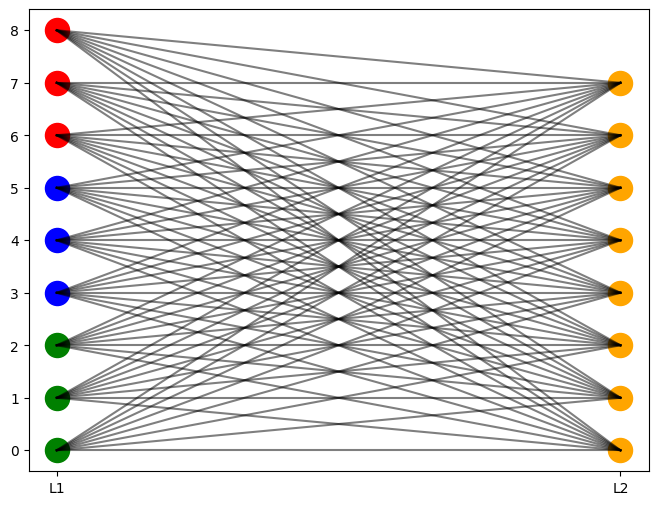

In [13]:
#Plotting a neural network
import numpy as np
import matplotlib.pyplot as plt

# Define the architecture
nodes_L1 = 9
nodes_L2 = 8

# Randomly initialize nodes and weights
np.random.seed(42)  # Set seed for reproducibility
weights_L1 = np.random.randn(nodes_L1, nodes_L2)

# Assign colors to nodes in L1
colors_L1 = ['green'] * (nodes_L1 // 3) + ['blue'] * (nodes_L1 // 3) + ['red'] * (nodes_L1 // 3)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot nodes in L1
for i in range(nodes_L1):
    ax.scatter(0, i, color=colors_L1[i], s=300, label=f'L1 Node {i + 1}')

# Plot nodes in L2
for j in range(nodes_L2):
    ax.scatter(1, j, color='orange', s=300, label=f'L2 Node {j + 1}')

# Plot connections (weights) between nodes
for i in range(nodes_L1):
    for j in range(nodes_L2):
        ax.plot([0, 1], [i, j], linestyle='-', color='black', alpha=0.5)

# Set labels and title
ax.set_xticks([0, 1])
ax.set_xticklabels(['L1', 'L2'])
ax.set_yticks(range(max(nodes_L1, nodes_L2)))
#ax.set_xlabel('Layers')
#ax.set_ylabel('Nodes')
#ax.set_title('Neural Network Architecture')

# Add legend
#ax.legend()

# Show the plot
plt.show()



In [48]:
#Demonstration of simple attention.  Initializing the vectors and creating dot product matrices
import numpy as np

# Initialize three vectors of three dimensions
vector1 = np.random.uniform(-1,1,3)
vector2 = np.random.uniform(-1,1,3)
vector3 = np.random.uniform(-1,1,3)

vector4 = np.random.uniform(-1,1,3)
vector5 = np.random.uniform(-1,1,3)
vector6 = np.random.uniform(-1,1,3)

# Compute dot product matrix 1 for the first three vectors
dot_products_matrix = np.zeros((3, 3))
dot_products_matrix[0, 0] = np.dot(vector1, vector1)
dot_products_matrix[0, 1] = np.dot(vector1, vector2)
dot_products_matrix[0, 2] = np.dot(vector1, vector3)
dot_products_matrix[1, 0] = np.dot(vector2, vector1)
dot_products_matrix[1, 1] = np.dot(vector2, vector2)
dot_products_matrix[1, 2] = np.dot(vector2, vector3)
dot_products_matrix[2, 0] = np.dot(vector3, vector1)
dot_products_matrix[2, 1] = np.dot(vector3, vector2)
dot_products_matrix[2, 2] = np.dot(vector3, vector3)

# Compute dot product matrix 2 for the next three vectors
dot_products_matrix2 = np.zeros((3, 3))
dot_products_matrix2[0, 0] = np.dot(vector4, vector4)
dot_products_matrix2[0, 1] = np.dot(vector4, vector5)
dot_products_matrix2[0, 2] = np.dot(vector4, vector6)
dot_products_matrix2[1, 0] = np.dot(vector5, vector4)
dot_products_matrix2[1, 1] = np.dot(vector5, vector5)
dot_products_matrix2[1, 2] = np.dot(vector5, vector6)
dot_products_matrix2[2, 0] = np.dot(vector6, vector4)
dot_products_matrix2[2, 1] = np.dot(vector6, vector5)
dot_products_matrix2[2, 2] = np.dot(vector6, vector6)

# Print original vectors with two decimal points
print("Vector 1:", np.round(vector1, 2))
print("Vector 2:", np.round(vector2, 2))
print("Vector 3:", np.round(vector3, 2))

# Print dot product matrix with two decimal points
print("\nDot Product Matrix:")
print(np.round(dot_products_matrix, 2))

# Print original vectors with two decimal points case 2
print("\nVector 4:", np.round(vector4, 2))
print("Vector 5:", np.round(vector5, 2))
print("Vector 6:", np.round(vector6, 2))

# Print dot product matrix with two decimal points
print("\nDot Product Matrix2:")
print(np.round(dot_products_matrix2, 2))

Vector 1: [0.26 0.59 0.01]
Vector 2: [ 0.15 -0.01 -0.61]
Vector 3: [ 0.44 -0.44 -0.95]

Dot Product Matrix:
[[ 0.42  0.03 -0.15]
 [ 0.03  0.4   0.65]
 [-0.15  0.65  1.3 ]]

Vector 4: [ 0.29 -0.65  0.88]
Vector 5: [ 0.91  0.83 -0.26]
Vector 6: [-0.97  0.86 -0.14]

Dot Product Matrix2:
[[ 1.28 -0.5  -0.96]
 [-0.5   1.58 -0.13]
 [-0.96 -0.13  1.69]]


In [49]:
#softmax

def softmax(matrix):
    exp_matrix = np.exp(matrix - np.max(matrix, axis=1, keepdims=True))
    softmax_matrix = exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)
    return softmax_matrix


# Apply softmax to each row
softmax_output1 = softmax(dot_products_matrix)
softmax_output2 = softmax(dot_products_matrix2)

print("\nSoftmax Outputs:\n")
print(np.round(softmax_output1,2),"\n")
print(np.round(softmax_output2,2))


Softmax Outputs:

[[0.44 0.3  0.25]
 [0.23 0.33 0.43]
 [0.13 0.3  0.57]] 

[[0.78 0.13 0.08]
 [0.1  0.77 0.14]
 [0.06 0.13 0.81]]


In [51]:
# Attention vectors
att1 = 0.44*vector1 + 0.30*vector2 + 0.25*vector3
att2 = 0.23*vector1 + 0.33*vector2 + 0.43*vector3
att3 = 0.13*vector1 + 0.30*vector2 + 0.57*vector3

# Print the result
print("Resultant Vectors for first set:\n")
print(np.round(att1,2))
print(np.round(att2,2))
print(np.round(att3,2))

#Compare with original vectors
print("\nVector 1:", np.round(vector1, 2))
print("Vector 2:", np.round(vector2, 2))
print("Vector 3:", np.round(vector3, 2))


Resultant Vectors for first set:

[ 0.27  0.15 -0.42]
[ 0.3  -0.06 -0.61]
[ 0.33 -0.18 -0.72]

Vector 1: [0.26 0.59 0.01]
Vector 2: [ 0.15 -0.01 -0.61]
Vector 3: [ 0.44 -0.44 -0.95]


In [58]:
#Self attention

# Initialize three 3x3 matrices
Q = np.random.uniform(-1,1, size=(3,3))
K = np.random.uniform(-1,1, size=(3,3))
V = np.random.uniform(-1,1, size=(3,3))

q = np.dot(Q, vector1)
k = np.dot(K, vector1)
v = np.dot(V, vector1)

print("\nquery vector=", np.round(q,2))
print("key vector=", np.round(k,2))
print("value vector=", np.round(v,2))


query vector= [-0.48  0.32  0.03]
key vector= [ 0.1  -0.15 -0.78]
value vector= [-0.41 -0.38 -0.56]
